In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=02936facfbe1b47412c990bf5012c74e


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nogliki
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | nenjiang
Processing Record 5 of Set 1 | celestun
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | cherskiy
Processing Record 8 of Set 1 | porto novo
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | saint anthony
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 1 | kiruna
Processing Record 20 of Set 1 | east london
Processing Record

Processing Record 37 of Set 4 | bridlington
Processing Record 38 of Set 4 | cabo san lucas
Processing Record 39 of Set 4 | roma
Processing Record 40 of Set 4 | xuddur
Processing Record 41 of Set 4 | paveh
Processing Record 42 of Set 4 | gazojak
Processing Record 43 of Set 4 | bakel
Processing Record 44 of Set 4 | araouane
Processing Record 45 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | noumea
Processing Record 48 of Set 4 | barrow
Processing Record 49 of Set 4 | balkanabat
Processing Record 50 of Set 4 | chhapar
Processing Record 1 of Set 5 | belaya gora
Processing Record 2 of Set 5 | shimoda
Processing Record 3 of Set 5 | tautira
Processing Record 4 of Set 5 | beloha
Processing Record 5 of Set 5 | saleaula
City not found. Skipping...
Processing Record 6 of Set 5 | brignoles
Processing Record 7 of Set 5 | posadas
Processing Record 8 of Set 5 | lompoc
Processing Record 9 of Set 5 | esperance
Processin

Processing Record 31 of Set 8 | saint stephen
Processing Record 32 of Set 8 | chernyshevskiy
Processing Record 33 of Set 8 | qusar
Processing Record 34 of Set 8 | broken hill
Processing Record 35 of Set 8 | simpang
Processing Record 36 of Set 8 | saint-francois
Processing Record 37 of Set 8 | lermontovka
Processing Record 38 of Set 8 | jalalabad
Processing Record 39 of Set 8 | santa cruz
Processing Record 40 of Set 8 | bosaso
Processing Record 41 of Set 8 | pakxe
Processing Record 42 of Set 8 | sivaki
Processing Record 43 of Set 8 | pisco
Processing Record 44 of Set 8 | mitu
Processing Record 45 of Set 8 | raga
Processing Record 46 of Set 8 | nantucket
Processing Record 47 of Set 8 | lamballe
Processing Record 48 of Set 8 | lakes entrance
Processing Record 49 of Set 8 | valparaiso
Processing Record 50 of Set 8 | mattru
Processing Record 1 of Set 9 | tura
Processing Record 2 of Set 9 | korem
Processing Record 3 of Set 9 | morbegno
Processing Record 4 of Set 9 | southend-on-sea
Processin

Processing Record 17 of Set 12 | phan thiet
Processing Record 18 of Set 12 | suixi
Processing Record 19 of Set 12 | andros town
Processing Record 20 of Set 12 | arrecife
Processing Record 21 of Set 12 | shasta lake
Processing Record 22 of Set 12 | chulman
Processing Record 23 of Set 12 | vanimo
Processing Record 24 of Set 12 | vila
Processing Record 25 of Set 12 | itaituba
Processing Record 26 of Set 12 | berlevag
Processing Record 27 of Set 12 | semnan
Processing Record 28 of Set 12 | verkhniye kigi
Processing Record 29 of Set 12 | jijiga
Processing Record 30 of Set 12 | thessalon
Processing Record 31 of Set 12 | sao felix do xingu
Processing Record 32 of Set 12 | takaka
Processing Record 33 of Set 12 | kindu
Processing Record 34 of Set 12 | egvekinot
Processing Record 35 of Set 12 | presidente medici
Processing Record 36 of Set 12 | arlit
Processing Record 37 of Set 12 | belokurikha
Processing Record 38 of Set 12 | chakwal
Processing Record 39 of Set 12 | sibu
Processing Record 40 of

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nogliki,51.8333,143.1667,58.14,95,49,7.74,RU,2021-07-21 14:17:04
1,Kavieng,-2.5744,150.7967,81.93,79,97,10.16,PG,2021-07-21 14:17:04
2,Nikolskoye,59.7035,30.7861,73.40,34,70,9.26,RU,2021-07-21 14:17:04
3,Nenjiang,49.1833,125.2167,74.50,88,57,4.21,CN,2021-07-21 14:17:05
4,Celestun,20.8667,-90.4000,80.78,78,3,9.42,MX,2021-07-21 14:17:05
5,Busselton,-33.6500,115.3333,51.08,80,93,8.55,AU,2021-07-21 14:15:45
6,Cherskiy,68.7500,161.3000,48.45,62,64,5.97,RU,2021-07-21 14:17:05
7,Porto Novo,6.4965,2.6036,81.75,66,98,11.30,BJ,2021-07-21 14:13:39
8,Yellowknife,62.4560,-114.3525,66.29,72,20,6.91,CA,2021-07-21 14:17:06
9,Hermanus,-34.4187,19.2345,50.90,65,100,26.53,ZA,2021-07-21 14:17:06


In [8]:
new_columns = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_columns]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nogliki,RU,2021-07-21 14:17:04,51.8333,143.1667,58.14,95,49,7.74
1,Kavieng,PG,2021-07-21 14:17:04,-2.5744,150.7967,81.93,79,97,10.16
2,Nikolskoye,RU,2021-07-21 14:17:04,59.7035,30.7861,73.40,34,70,9.26
3,Nenjiang,CN,2021-07-21 14:17:05,49.1833,125.2167,74.50,88,57,4.21
4,Celestun,MX,2021-07-21 14:17:05,20.8667,-90.4000,80.78,78,3,9.42
5,Busselton,AU,2021-07-21 14:15:45,-33.6500,115.3333,51.08,80,93,8.55
6,Cherskiy,RU,2021-07-21 14:17:05,68.7500,161.3000,48.45,62,64,5.97
7,Porto Novo,BJ,2021-07-21 14:13:39,6.4965,2.6036,81.75,66,98,11.30
8,Yellowknife,CA,2021-07-21 14:17:06,62.4560,-114.3525,66.29,72,20,6.91
9,Hermanus,ZA,2021-07-21 14:17:06,-34.4187,19.2345,50.90,65,100,26.53


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

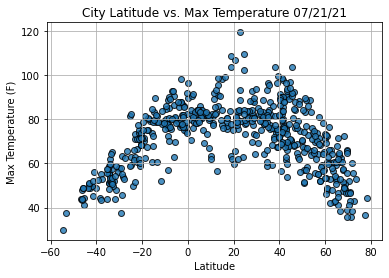

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

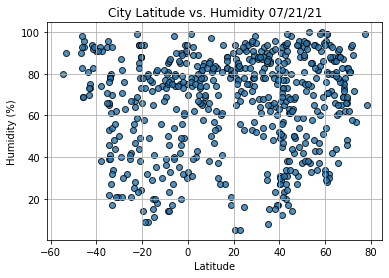

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

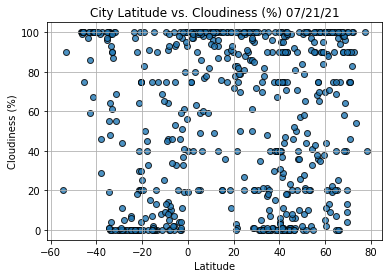

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

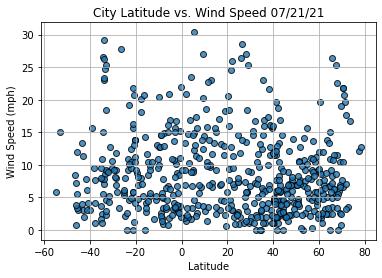

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

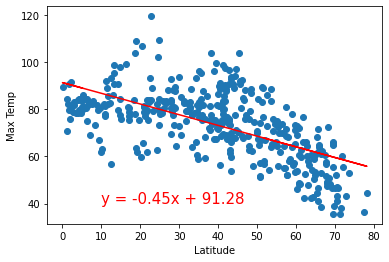

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

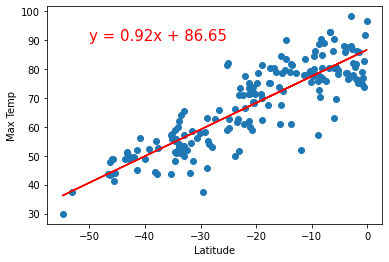

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

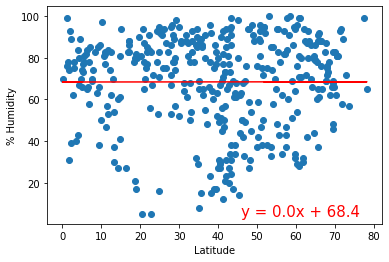

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(46,4))

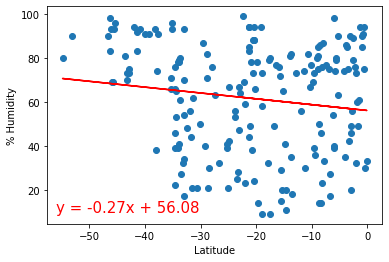

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-56,10))

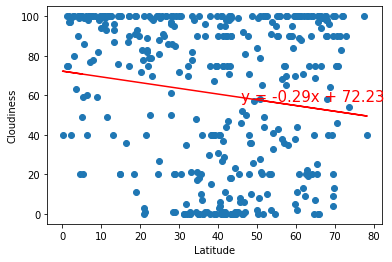

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(46,57))

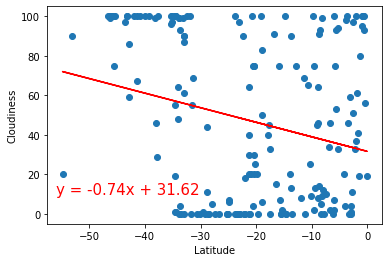

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness', 'Cloudiness',(-56,10))

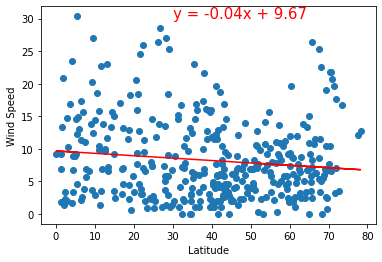

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(30,30))

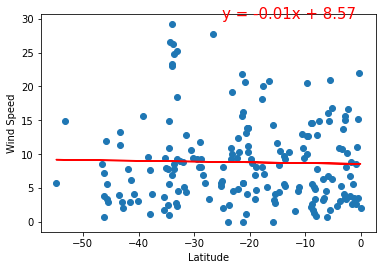

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-25,30))